In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


import gc
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb

pd.set_option('display.max_columns', 100)

In [56]:
RFC_metrics = 'gini'
NUM_Estimators = 100
no_Jobs = 4
NO_JOBS = -1 # Use all available cores

valid_size = 0.2

Number_KFolds = 5

RandomState = 2018

Max_Rounds = 1000
early_stop = 50
opt_rounds = 1000
verbose_eval = 50


In [57]:
data_df = pd.read_csv("UCI_Credit_Card.csv")
data_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [58]:
data_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [59]:
data_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [60]:
# Check for Any Missing Data 
for i in range (25):
    print("The number of null values in column", i, "are:" )
    NullCheck = data_df.iloc[:,i].isnull().sum()
    print(NullCheck)

The number of null values in column 0 are:
0
The number of null values in column 1 are:
0
The number of null values in column 2 are:
0
The number of null values in column 3 are:
0
The number of null values in column 4 are:
0
The number of null values in column 5 are:
0
The number of null values in column 6 are:
0
The number of null values in column 7 are:
0
The number of null values in column 8 are:
0
The number of null values in column 9 are:
0
The number of null values in column 10 are:
0
The number of null values in column 11 are:
0
The number of null values in column 12 are:
0
The number of null values in column 13 are:
0
The number of null values in column 14 are:
0
The number of null values in column 15 are:
0
The number of null values in column 16 are:
0
The number of null values in column 17 are:
0
The number of null values in column 18 are:
0
The number of null values in column 19 are:
0
The number of null values in column 20 are:
0
The number of null values in column 21 are:


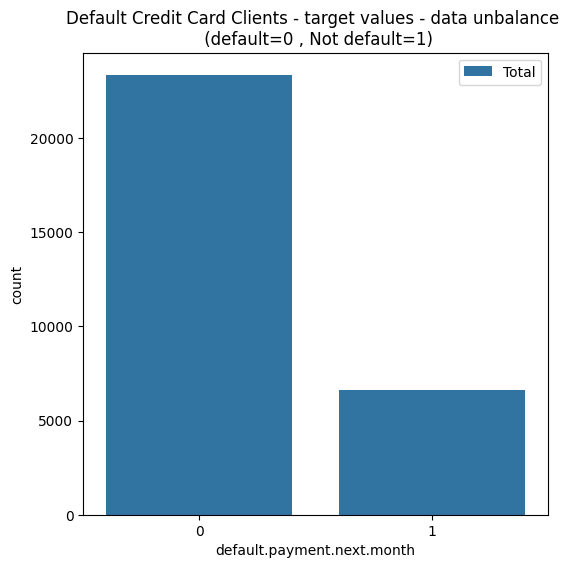

In [61]:
temp = data_df["default.payment.next.month"].value_counts()
df = pd.DataFrame({'default.payment.next.month': temp.index, 'count': temp.values})
plt.figure (figsize=(6,6))
plt.title( 'Default Credit Card Clients - target values - data unbalance \n (default=0 , Not default=1)' )
sns.set_color_codes("pastel")
sns.barplot(x='default.payment.next.month', y='count', data=df, label="Total", )
locs, labels = plt.xticks()
plt.show()

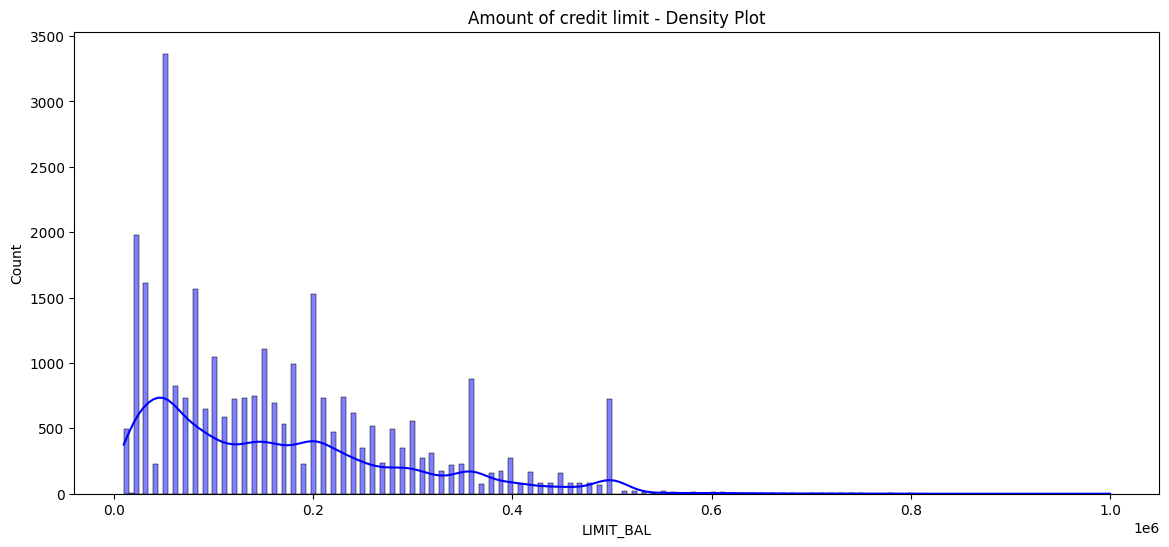

In [62]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.histplot(data_df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

In [63]:
data_df['LIMIT_BAL'].value_counts().shape
#There are 81 distinct values for amount of credit limit.

(81,)

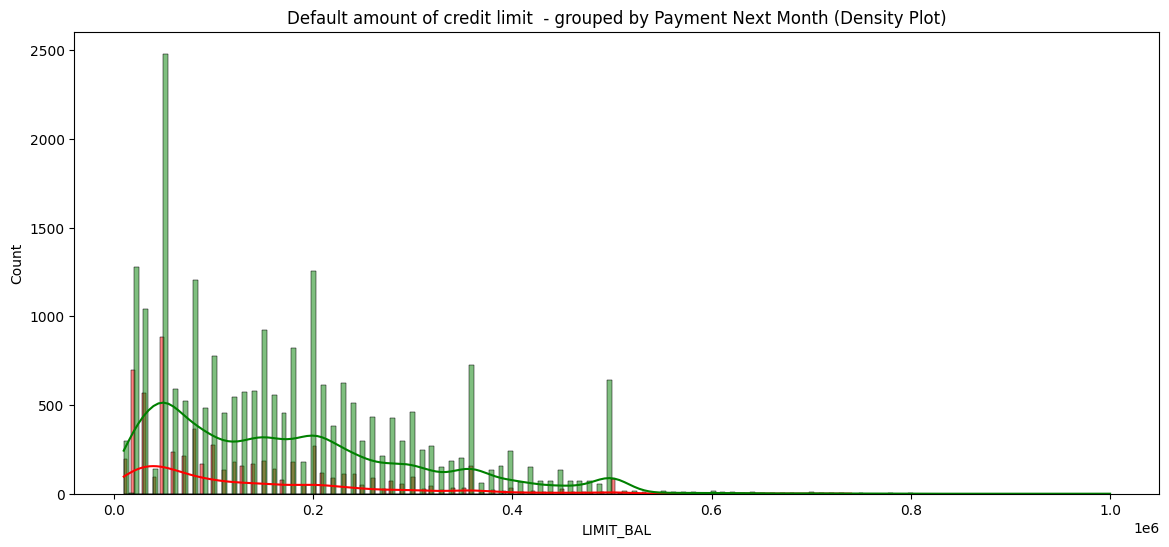

In [64]:
#Amount of credit limit grouped 
class_0 = data_df.loc[data_df['default.payment.next.month'] == 0]["LIMIT_BAL"]
class_1 = data_df.loc[data_df['default.payment.next.month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.histplot(class_1,kde=True,bins=200, color="red")
sns.histplot(class_0,kde=True,bins=200, color="green")
plt.show()

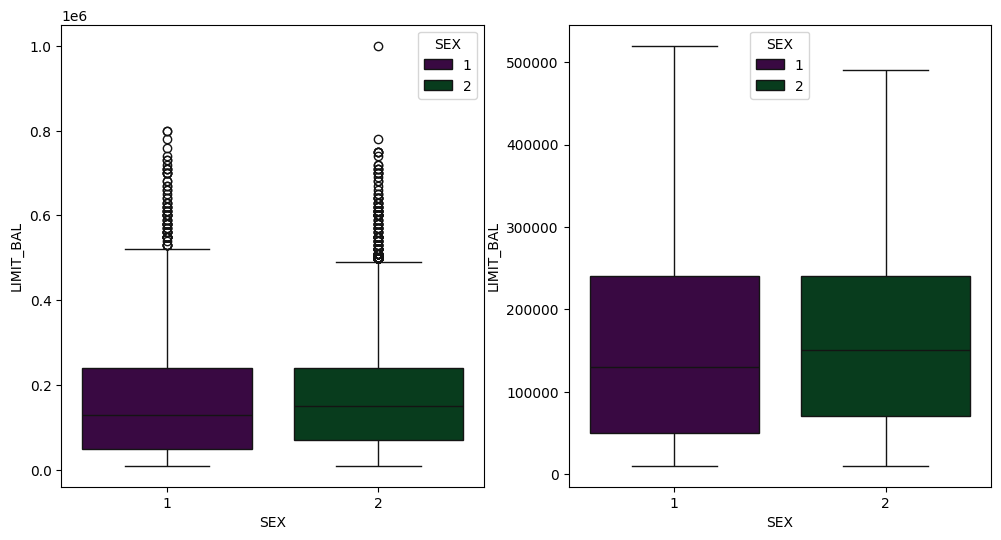

In [65]:
#Credit limit vs. sex
# sex1 = male , Sex2= Female
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=data_df, palette="PRGn",showfliers=False)
plt.show();

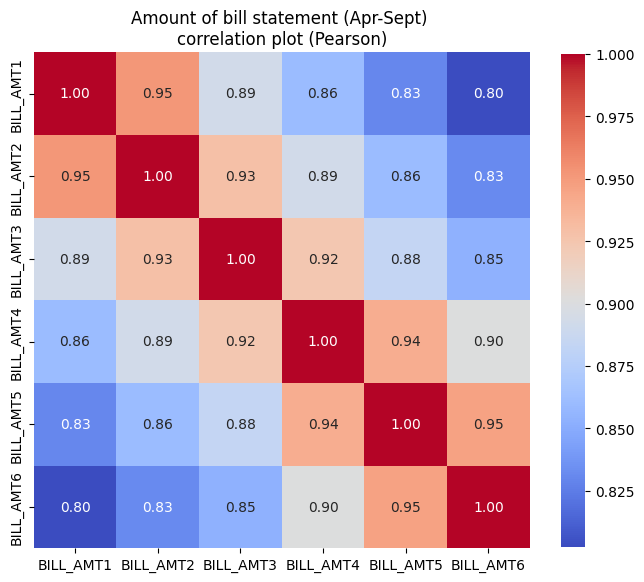

In [66]:
#correlation of Amount of bill statement

var = [f'BILL_AMT{i}' for i in range(1, 7)] 
plt.figure(figsize=(8,8))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = data_df[var].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.show()

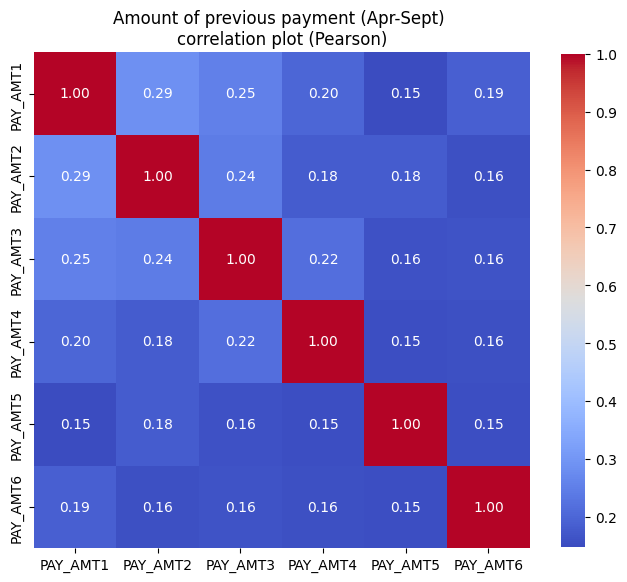

In [67]:
#correlation of Amount of previous payment

var = [f'PAY_AMT{i}' for i in range(1, 7)] 
plt.figure(figsize=(8,8))
plt.title('Amount of previous payment (Apr-Sept) \ncorrelation plot (Pearson)')
corr = data_df[var].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.show()

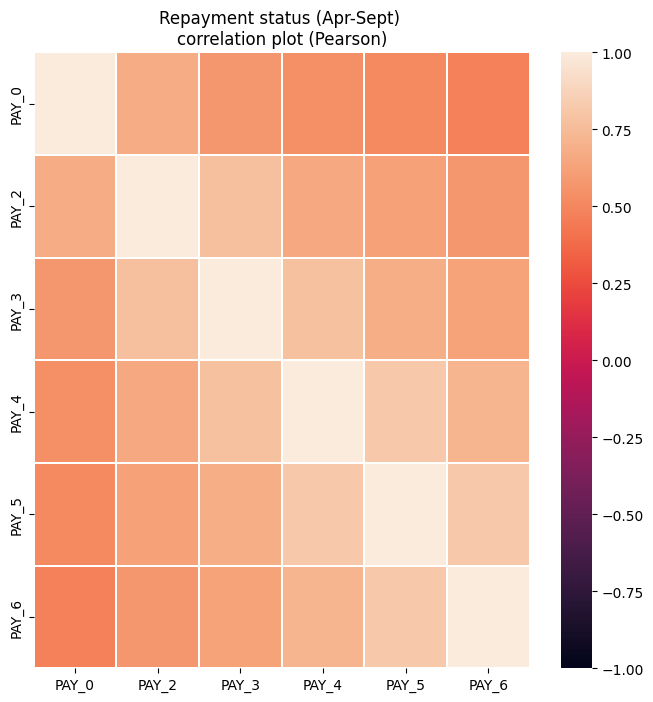

In [68]:
#correlation between Repayment

var = ['PAY_0'] + [f'PAY_{i}' for i in range(2, 7)]

plt.figure(figsize = (8,8))
plt.title('Repayment status (Apr-Sept) \ncorrelation plot (Pearson)')
corr = data_df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

In [69]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=data_df, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

C:\Users\B RAHUL\AppData\Local\Temp\ipykernel_10248\194634451.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


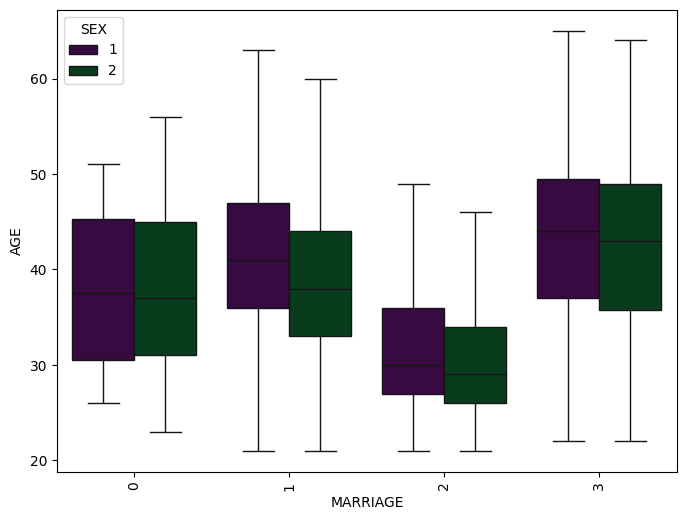

In [70]:
#boxplots with age distribution grouped by marriage status and sex

boxplot_variation('MARRIAGE','AGE', 'SEX',8)

C:\Users\B RAHUL\AppData\Local\Temp\ipykernel_10248\194634451.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


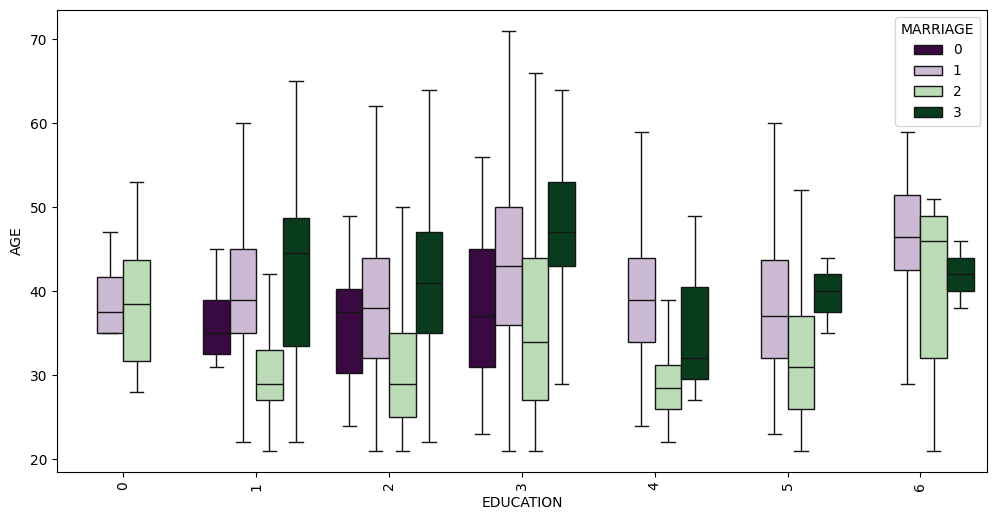

In [71]:
#boxplots with age distribution grouped by education and marriage.



boxplot_variation('EDUCATION','AGE', 'MARRIAGE',12)

C:\Users\B RAHUL\AppData\Local\Temp\ipykernel_10248\194634451.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


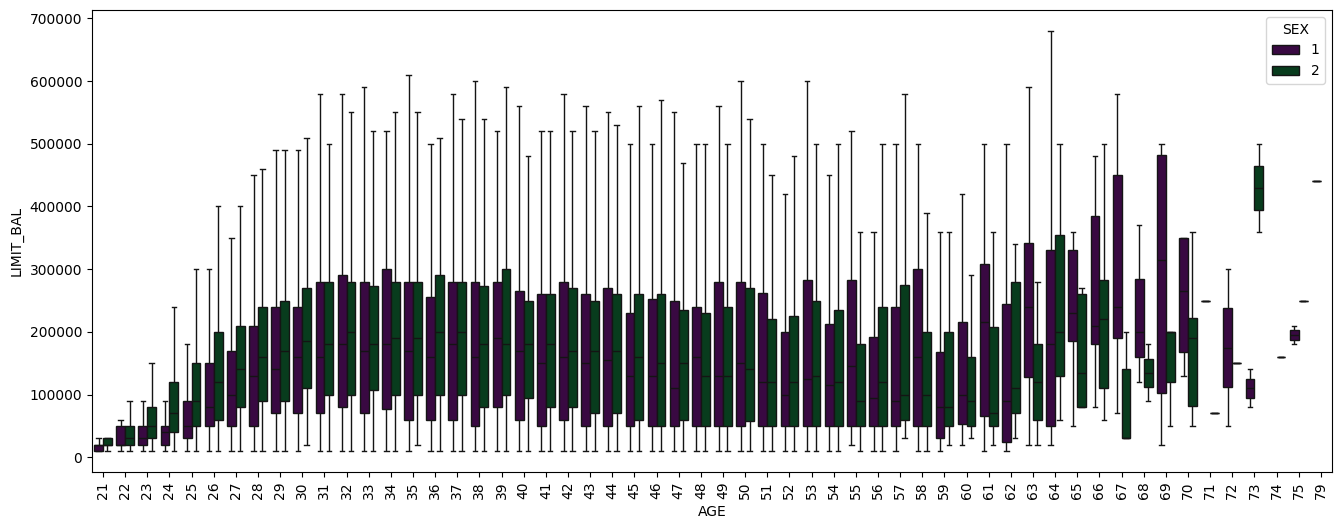

In [72]:
#boxplots with credit amount limit distribution grouped by age and sex.
boxplot_variation('AGE' , 'LIMIT_BAL' , 'SEX' , 16)

C:\Users\B RAHUL\AppData\Local\Temp\ipykernel_10248\194634451.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


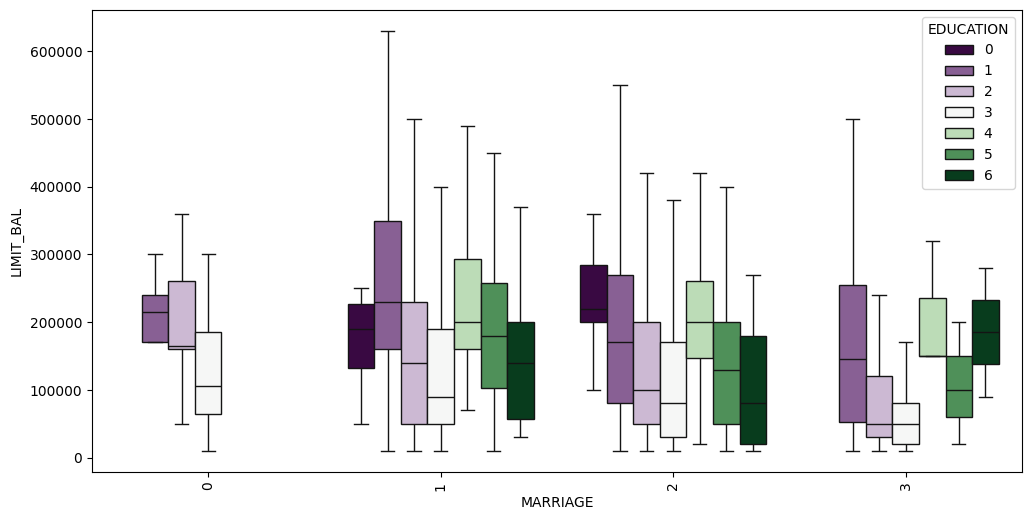

In [73]:
#boxplots with credit amount limit distribution grouped by marriage status and education level.

boxplot_variation('MARRIAGE','LIMIT_BAL', 'EDUCATION',12)

In [93]:
target = 'default.payment.next.month'

# Create the list of predictors using a combination of fixed columns and list comprehensions
predictors = [
    'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE'
] + [
    'PAY_0'
] + [
    f'PAY_{i}' for i in range(2, 7)
] + [
    f'BILL_AMT{i}' for i in range(1, 7)
] + [
    f'PAY_AMT{i}' for i in range(1, 7)
]

In [94]:
#Split data in train and validation set

train_df , val_df = train_test_split(data_df, test_size=valid_size, random_state=RandomState, shuffle=True)



In [95]:
#copies of the train_df and val_df 

train_df_bkp = train_df.copy()
val_df_bkp = val_df.copy()
 

In [98]:
clf = RandomForestClassifier(n_jobs=NO_JOBS, random_state=RANDOM_STATE,criterion=RFC_METRIC,n_estimators=NUM_ESTIMATORS, verbose=False)                       
                             

In [99]:
clf.fit(train_df[predictors], train_df[target].values)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [101]:
#predict the target values for the val_df data, using predict function.
preds = clf.predict(val_df[predictors])

C:\Users\B RAHUL\AppData\Local\Temp\ipykernel_10248\3992975389.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


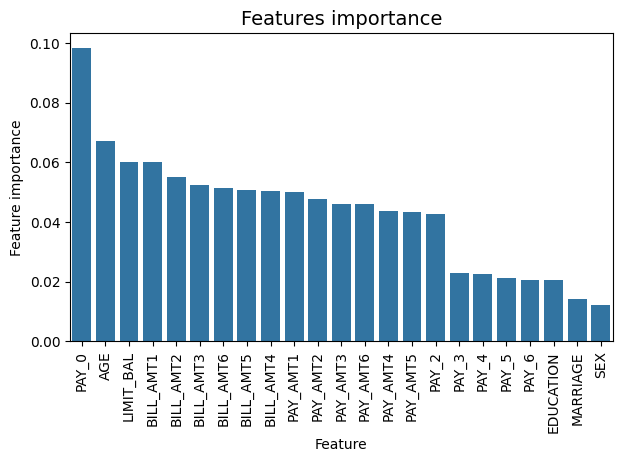

In [100]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

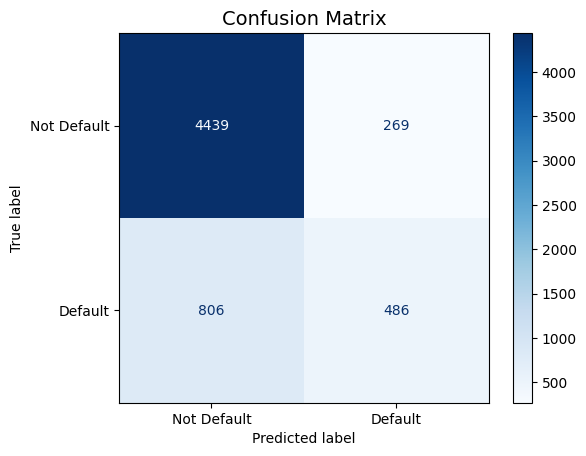

In [102]:
#Confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Calculate the confusion matrix using scikit-learn's function
cm = confusion_matrix(val_df[target].values, preds)

# 2. Create the display object with the matrix and labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Default', 'Default'])

# 3. Plot the matrix
disp.plot(cmap="Blues", values_format='d')

plt.title('Confusion Matrix', fontsize=14)
plt.show()


In [103]:
#calculate area under curve (receiver operator characteristic).

roc_auc_score(val_df[target].values, preds)

0.6595121011334373

In [112]:
#RandomForrest with OneHotEncoder

cat_features = ['EDUCATION', 'SEX', 'MARRIAGE', 'PAY_0'] + [f'PAY_{i}' for i in range(2, 7)]

In [114]:
train_f_df = pd.get_dummies(train_df_bkp, columns = cat_features)
val_f_df = pd.get_dummies(val_df_bkp, columns = cat_features)

In [115]:
print("Default of Credit Card Clients train data -  rows:",train_f_df.shape[0]," columns:", train_f_df.shape[1])
print("Default of Credit Card Clients val  data -  rows:",val_f_df.shape[0]," columns:", val_f_df.shape[1])

Default of Credit Card Clients train data -  rows: 24000  columns: 93
Default of Credit Card Clients val  data -  rows: 6000  columns: 86


In [ ]:
#train and validation data does not have the same number of columns, we will align them.
train_fa_df, val_fa_df = train_f_df.align(val_f_df, join='outer', axis=1, fill_value=0)

In [117]:
#let's check  the data again

print("Default of Credit Card Clients train data -  rows:",train_fa_df.shape[0]," columns:", train_fa_df.shape[1])
print("Default of Credit Card Clients val  data -  rows:",val_fa_df.shape[0]," columns:", val_fa_df.shape[1])

Default of Credit Card Clients train data -  rows: 24000  columns: 93
Default of Credit Card Clients val  data -  rows: 6000  columns: 93


In [120]:
train_fa_df.head(5)

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,ID,LIMIT_BAL,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-1,PAY_0_-2,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-1,PAY_2_-2,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-1,PAY_3_-2,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_-2,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_-2,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,default.payment.next.month
22659,48,175095.0,175522.0,173918.0,174074.0,178671.0,178869.0,False,False,False,True,False,False,False,22660,150000.0,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,10011.0,6200.0,5874.0,10000.0,6054.0,7108.0,False,True,0
6618,37,8788.0,40927.0,28306.0,31578.0,21195.0,11776.0,False,False,True,False,False,False,False,6619,180000.0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,40970.0,1210.0,10015.0,10009.0,11783.0,110306.0,True,False,0
26605,23,2400.0,2400.0,2400.0,2400.0,2400.0,1800.0,False,False,True,False,False,False,False,26606,20000.0,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,0.0,0.0,0.0,0.0,0.0,0.0,True,False,1
2504,30,440.0,30404.0,0.0,880.0,150.0,430.0,False,False,True,False,False,False,False,2505,180000.0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,30404.0,0.0,880.0,150.0,430.0,747.0,True,False,0
1111,44,3424.0,155.0,1922.0,1473.0,1865.0,835.0,False,False,False,True,False,False,False,1112,50000.0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,155.0,1922.0,1473.0,1865.0,835.0,1833.0,False,True,0


In [121]:
val_fa_df.head(5)

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,ID,LIMIT_BAL,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-1,PAY_0_-2,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-1,PAY_2_-2,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-1,PAY_3_-2,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_-2,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_-2,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,default.payment.next.month
8343,30,37522.0,38614.0,39671.0,40213.0,41064.0,43382.0,False,False,True,False,False,False,False,8344,50000.0,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,0,False,False,True,0,False,False,False,False,False,False,0,False,False,True,0,False,False,False,False,False,False,0,False,False,True,False,False,False,False,False,False,0,False,False,True,False,False,False,False,False,False,0,2000.0,2000.0,1500.0,1500.0,3000.0,2000.0,False,True,0
2228,29,53274.0,54093.0,53111.0,50568.0,47791.0,45421.0,False,False,True,False,False,False,False,2229,60000.0,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,0,False,False,True,0,False,False,False,False,False,False,0,False,False,True,0,False,False,False,False,False,False,0,False,False,True,False,False,False,False,False,False,0,False,False,True,False,False,False,False,False,False,0,2591.0,2109.0,1705.0,2010.0,2000.0,1523.0,False,True,0
6293,55,2326.0,4917.0,4906.0,4707.0,2254.0,5375.0,False,True,False,False,False,False,False,6294,280000.0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,False,False,True,0,False,False,False,False,False,False,0,False,False,True,0,False,False,False,False,False,False,0,False,False,False,True,False,False,False,False,False,0,True,False,False,False,False,False,False,False,False,0,4917.0,2453.0,2254.0,0.0,5375.0,1165.0,True,False,0
16805,43,4166.0,4166.0,4216.0,4166.0,4166.0,4166.0,False,False,False,True,False,False,False,16806,50000.0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,True,False,False,0,False,False,False,False,False,False,0,False,False,True,0,False,False,False,False,False,False,0,True,False,False,False,False,False,False,False,False,0,True,False,False,False,False,False,False,False,False,0,4166.0,4216.0,4116.0,4166.0,4166.0,4166.0,True,False,0
3519,34,383973.0,380082.0,389694.0,342198.0,344808.0,347188.0,False,False,True,False,False,False,False,3520,550000.0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,0,False,False,True,0,False,False,False,False,False,False,0,False,False,True,0,False,False,False,False,False,False,0,False,False,True,False,False,False,False,False,False,0,False,False,True,False,False,False,False,False,False,0,15000.0,20000.0,20000.0,12000.0,12000.0,13000.0,False,True,0


In [122]:
target = 'default.payment.next.month'
predictors_f = [col for col in train_f_df.columns if col != target]

In [ ]:
#train the RandonForestClassifier using the train_fa_df data and fit function.

clf.fit(train_fa_df[predictors_f], train_fa_df[target].values)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [124]:
#predict the target values for the val_df data, using predict function.

preds = clf.predict(val_fa_df[predictors_f])

C:\Users\B RAHUL\AppData\Local\Temp\ipykernel_10248\3923788831.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


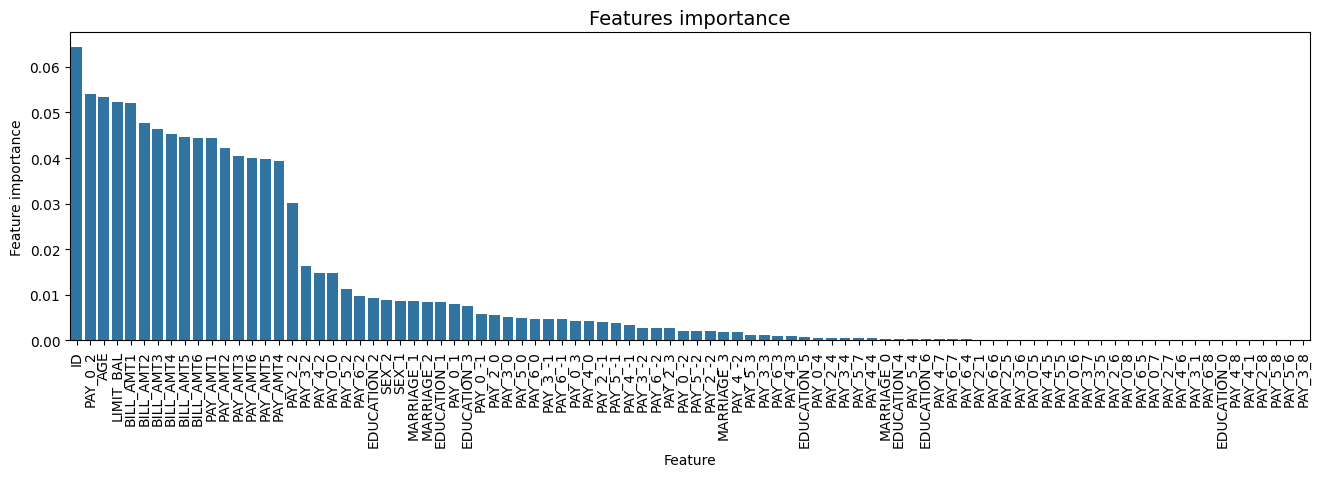

In [125]:
#Features importance

tmp = pd.DataFrame({'Feature': predictors_f, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (16,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

The most important features are PAY_0, AGE, BILL_AMT1, LIMIT_BAL, BILL_AMT2, BILL_AMT3.

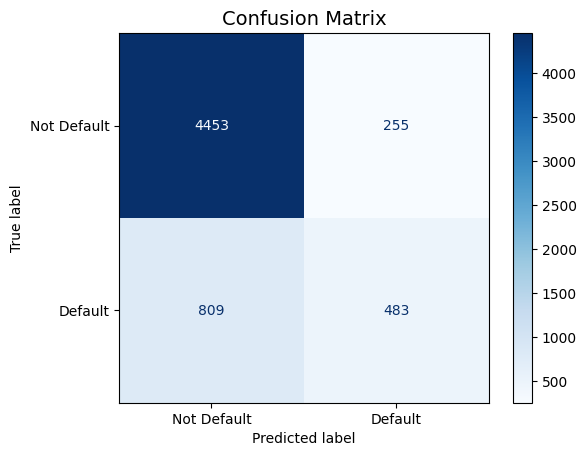

In [126]:
#CONFUSION MATRIX


cm = confusion_matrix(val_df[target].values, preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Default', 'Default'])
disp.plot(cmap="Blues")

plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [127]:
#calculate area under curve (receiver operator characteristic)

roc_auc_score(val_fa_df[target].values, preds)

0.6598379413474463

With the dummified features, the improvement of the AUC score is quite small.